# Задание 6. 
Решить систему дифференциальных уравнений (задание – 9.3, варианты – 9.4).

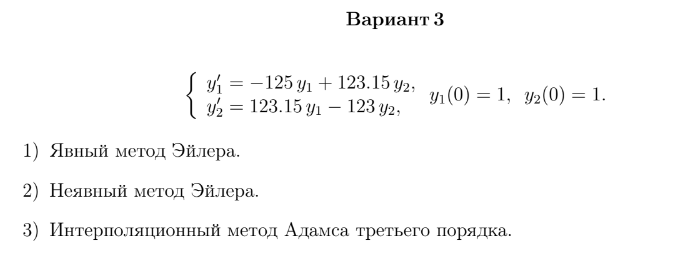

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A = np.array([[-125, 123.05], [123.05, -123]])
y0 = np.array([[1],[1]])
n = A.shape[0]

a, b = 0, 0.5
h0 = 0.1
h1 = 0.05

w = np.linalg.eig(A)[0]
v = np.linalg.eig(A)[1]
ff = np.linalg.solve(v, y0)
W = ff * v

def f(t):
  x = np.exp(t * w)
  return np.dot(W, x)

# Точное решение
def exact(aa, bb, h):
  y = []
  size = int((bb - aa) / h) + 1
  for i in range(size):
    y.append(f(a + i * h).reshape(1, n))
  y = np.array(y)
  return y

# Метод Эйлера
def Euler(aa, bb, h):
  E = np.eye(n)
  W = E + A * h
  size = int((bb - aa) / h) + 1
  y = [[0] * n for i in range(size)]
  y[0] = y0
  for i in np.arange(1, len(y)):
    y[i] = W.dot(y[i - 1])  
  y = np.array(y)
  y = y.reshape(size, 2)
  return y

# Обратный метод Эйлера
def Rev_Euler(aa, bb, h):
 E = np.eye(n)
 W = E - A * h
 W = np.linalg.inv(W)
 size = int((bb - aa) / h) + 1
 y = [[0] * n for i in range(size)]
 y[0] = y0
 for i in np.arange(1, len(y)):
   y[i] = W.dot(y[i - 1])
 y = np.array(y)
 y = y.reshape(size, 2)
 return y

EX = exact (a, b, h0)

# Интерполяционный метод Адамса третьего порядка
def Adams(aa, bb, h):
  E = np.eye(n)
  W1 = np.dot(np.linalg.inv(E - 5 * h * A / 12), E + 2 * h * A / 3)
  W2 = np.dot(np.linalg.inv(E - 5 * h * A / 12), h * A / 12)
  size = int((bb - aa) / h) + 1
  y = [[0] * n for i in range(size)]
  y[0] = y0
  y[1] = EX[1].T
  for i in range(2, size):
    y[i] = W1.dot(y[i-1]) - W2.dot(y[i-2])
  
  y = np.array(y)
  y = y.reshape(size, 2)
  return y

# Таблица результатов
def table(aa, bb, h):
  size = int((bb - aa) / h) + 1
  exact1 = exact(aa,bb,h).reshape(size, 2)
  return pd.DataFrame( {"Точное y1": exact1[:, 0],
                        "Точное y2": exact1[:, 1],
                        "Эйлер y1": exact1[:, 0] - Euler(aa,bb,h)[:, 0],
                        "Эйлер y2": exact1[:, 1] - Euler(aa,bb,h)[:, 1],
                        "Обратный Эйлер y1": exact1[:, 0] - Rev_Euler(aa,bb,h)[:, 0],
                        "Обратный Эйлер y2": exact1[:, 1] - Rev_Euler(aa,bb,h)[:, 1],
                        "Адамс y1": exact1[:, 0] - Adams(aa,bb,h)[:, 0],
                        "Адамс y2": exact1[:, 1] - Adams(aa,bb,h)[:, 1],
                        })

print("Таблица результатов с шагом h = 0.05:")
table(a,b,h1)

Таблица результатов с шагом h = 0.05:


,Точное y1,Точное y2,Эйлер y1,Эйлер y2,Обратный Эйлер y1,Обратный Эйлер y2,Адамс y1,Адамс y2
0,0.008127,0.008127,-9.918735e-01,-9.918735e-01,-0.991873,-0.991873,-0.991873,-0.991873
1,0.003860,0.957660,-8.986402e-01,-4.484026e-02,-0.947389,-0.000740,0.000178,0.044236
2,0.003681,0.913424,-1.426075e+00,5.236678e-01,-0.904340,-0.001961,-0.971694,1.002212
3,0.003511,0.871228,5.111756e+00,-5.918103e+00,-0.863482,-0.002837,0.291589,-0.252604
4,0.003349,0.830981,-6.858629e+01,6.722451e+01,-0.824489,-0.003612,-1.318374,1.342636
5,0.003194,0.792593,7.685850e+02,-7.631319e+02,-0.787258,-0.004309,0.825679,-0.785678
6,0.003047,0.755978,-8.735097e+03,8.663667e+03,-0.751708,-0.004935,-1.931741,1.947886
7,0.002906,0.721055,9.915783e+04,-9.835597e+04,-0.717763,-0.005494,1.707011,-1.662884
8,0.002772,0.687746,-1.125718e+06,1.116606e+06,-0.685351,-0.005992,-3.005098,3.009687
9,0.002644,0.655975,1.277994e+07,-1.267650e+07,-0.654403,-0.006434,3.181601,-3.128274


In [2]:
h2 = 0.001
print("Таблица результатов с шагом h = 0.001:")
table(a,b,h2)

Таблица результатов с шагом h = 0.001:


,Точное y1,Точное y2,Эйлер y1,Эйлер y2,Обратный Эйлер y1,Обратный Эйлер y2,Адамс y1,Адамс y2
0,0.008127,0.008127,-0.991873,-0.991873,-0.991873,-0.991873,-0.991873,-0.991873
1,0.007230,0.225186,-0.990820,-0.774864,-0.991021,-0.774667,0.003548,-0.688238
2,0.006528,0.394523,-0.989822,-0.605331,-0.990134,-0.605024,-0.107211,-0.408951
3,0.005980,0.526586,-0.988859,-0.472887,-0.989223,-0.472530,-0.182407,-0.201979
4,0.005550,0.629533,-0.987918,-0.369419,-0.988298,-0.369050,-0.241327,-0.040149
...,...,...,...,...,...,...,...,...
496,0.002531,0.628043,-0.620291,0.000139,-0.620567,-0.000139,-0.284578,0.338591
497,0.002529,0.627450,-0.619704,0.000140,-0.619981,-0.000139,-0.284309,0.338271
498,0.002527,0.626856,-0.619118,0.000140,-0.619395,-0.000140,-0.284040,0.337951
499,0.002524,0.626264,-0.618532,0.000140,-0.618809,-0.000140,-0.283772,0.337632


In [3]:
# Проверка на устойчивость
max_eig = max(map(abs, w))
h_Eul = 2/max_eig
h_Ad = 6/max_eig
print('Метод Эйлера устойчив при h <', h_Eul)
print('Обратный метод Эйлера устойчив при любом h')
print('Метод Адамса устойчив при h <', h_Ad)

Метод Эйлера устойчив при h < 0.00809539407330081
Обратный метод Эйлера устойчив при любом h
Метод Адамса устойчив при h < 0.024286182219902433


*Работу выполнил Пашов Павел, группа 323.*